# 畳み込みニューラルネットワーク

In [9]:
from sklearn.datasets import load_sample_image
from tensorflow import keras
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

- 画像のサイズは[高さ，幅，チャネル数]
- Tensorは[ミニバッチサイズ，高さ，幅，チャネル数]
- フィルターは[高さ，幅，チャネル数，枚数]

In [6]:
"""サンプル画像の読み込み"""
china=load_sample_image("china.jpg")/255
flower=load_sample_image("flower.jpg")/255
images=np.array([china,flower])
batch_size,height,width,channels=images.shape
print(china.shape)
print(images.shape)

(427, 640, 3)
(2, 427, 640, 3)


In [10]:
"""フィルター作成"""
filters=np.zeros(shape=(7,7,channels,2),dtype=np.float32)#[高さ，幅，チャネル数，枚数]
filters[:,3,:,0]=1#vertical line
filters[3,:,:,1]=1#horizontal line

outputs=tf.nn.conv2d(images,filters,strides=1,padding="SAME")#strides=[バッチ方向，縦，横，チャネル方向]

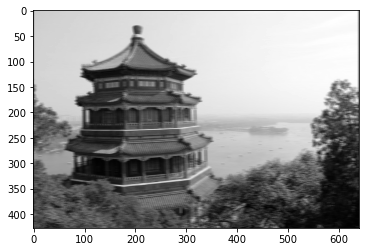

In [18]:
plt.imshow(outputs[0,:,:,1],cmap="gray")
plt.show()

In [20]:
conv=keras.layers.Conv2D(filters=32,kernel_size=3,strides=1,padding="same",activation="relu")
max_pool=keras.layers.MaxPool2D(pool_size=2)#AvgPool2Dもある．
output=tf.nn.max_pool(images,ksize=(1,1,1,3),strides=(1,1,1,3),padding="VALID")

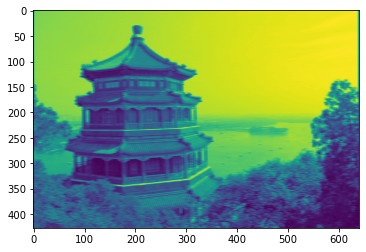

In [24]:
plt.imshow(outputs[0,:,:,1])#,cmap="gray"
plt.show()

# ここからはMNISTデータを用いてCNNを作成してみよう

In [25]:
fashion_mnist=keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist.load_data()
print(X_train_full.shape)
print(y_train_full.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [26]:
X_valid,X_train=X_train_full[:5000]/255.0,X_train_full[5000:]/255.0#勾配降下法をしようするので，ピクセル強度を0~1にスケーリングするために255で割ってる
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]
class_names=["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
print(class_names[y_train[0]])
print(X_train.shape)
print(X_valid.shape)

Coat
(55000, 28, 28)
(5000, 28, 28)


In [27]:
model = keras.models.Sequential([
keras.layers.Conv2D(64, 7, activation="relu", padding="same",
input_shape=[28, 28, 1]),
keras.layers.MaxPooling2D(2),
keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
keras.layers.MaxPooling2D(2),
keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
keras.layers.MaxPooling2D(2),
keras.layers.Flatten(),
keras.layers.Dense(128, activation="relu"),
keras.layers.Dropout(0.5),
keras.layers.Dense(64, activation="relu"),
keras.layers.Dropout(0.5),
keras.layers.Dense(10, activation="softmax")
])